# TASS Projekt 1 - ćwiczenie B
Filip Mazur, 300224
2022Z

In [3]:
import networkx as nx
import numpy as np
import random
import statistics

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np
%matplotlib inline

In [4]:
# read file and save to list
with open("dane/data_cw2.txt", "r") as fd:
    edges = [tuple(map(int, line.rstrip().split(" "))) for line in fd]

In [5]:
# check if edges are loaded properly
edges[:10]

[(1, 2),
 (3, 2),
 (3, 4),
 (5, 2),
 (5, 6),
 (7, 2),
 (7, 8),
 (7, 9),
 (7, 10),
 (11, 12)]

In [6]:
# create graph
G = nx.MultiGraph()
G.add_edges_from(edges)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 2,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,


In [7]:
G

## Pierwotna sieć
rząd i rozmiar sieci

In [8]:
# rzad (liczba wierzcholkow)
G.number_of_nodes()

3425

In [9]:
# rozmiar (liczba krawedzi)
G.number_of_edges()

67663

## Usunięcie pętli i podwójnych krawędzi
Następnie ponowne zbadanie sieci: rzędu i rozmiaru

In [10]:
# usuniecie petli
G.remove_edges_from(nx.selfloop_edges(G))

# przeksztalcenie grafu na graf bez zdublowanych krawedzi
G2 = nx.Graph()
G2.add_edges_from(G.edges())

# przypisanie obliczonego grafu do zmiennej G
G = G2
type(G)

networkx.classes.graph.Graph

In [11]:
# rzad 
G.number_of_nodes()

3425

In [12]:
# rozmiar
G.number_of_edges()

19256

Liczba krawędzi zmniejszyła się ponad 3-krotnie

In [39]:
# largest connected component
largest_cc = max(nx.connected_components(G), key=len)
GCC = G.subgraph(largest_cc).copy()

In [40]:
# rzad najwiekszego spojnego komponentu
GCC.number_of_nodes()

3397

In [41]:
# rozmiar najwiekszego spojnego komponentu
GCC.number_of_edges()

19230

Jak widać pierwotny graf nie był spójny - posiadał 3425 wierzchołków, a największy spójny podgraf ma 3397 wierzchołków.

## Aproksymacja średniej długości ścieżki

In [42]:
# 100 el. proba losowa ('losowanie' ze zwracaniem)
k = 100
spaths_length = np.zeros(k, dtype=np.int32)
for i in range(k):
    random_nodes = random.sample(list(GCC.nodes()), 2)
    spaths_length[i] = (nx.shortest_path_length(GCC, random_nodes[0], random_nodes[1]))
    
print(np.mean(spaths_length))

4.13


In [43]:
# 1000 el. proba losowa
k = 1000
spaths_length = np.zeros(k, dtype=np.int32)
for i in range(k):
    random_nodes = random.sample(list(GCC.nodes()), 2)
    spaths_length[i] = (nx.shortest_path_length(GCC, random_nodes[0], random_nodes[1]))
    
print(np.mean(spaths_length))

4.087


In [44]:
# 10000 el. proba losowa
k = 10000
spaths_length = np.zeros(k, dtype=np.int32)
for i in range(k):
    random_nodes = random.sample(list(GCC.nodes()), 2)
    spaths_length[i] = (nx.shortest_path_length(GCC, random_nodes[0], random_nodes[1]))
    
print(np.mean(spaths_length))

4.109


## Badanie rdzeni

In [19]:
# rdzen o maksymalnym rzedzie
G_core = nx.k_core(GCC)
print(G_core)
k_max_1 = min([ degree for (node, degree) in G_core.degree()])
print("minimalny stopien wierzcholka w rdzeniu (rzad rdzenia) {}".format(k_max_1))

components = [nx.connected_components(G_core)]
print("Rzad = {} , liczba rdzeni = {}".format(k_max_1, len(components)))

Graph with 93 nodes and 2257 edges
minimalny stopien wierzcholka w rdzeniu (rzad rdzenia) 31
Rzad = 31 , liczba rdzeni = 1


In [20]:
# rdzen o drugim mozliwie najwiekszym rzedzie
k_max_2 = k_max_1 - 1
G_core = nx.k_core(GCC, 30)
print(G_core)
print("minimalny stopien wierzcholka w rdzeniu {}".format(min([ degree for (node, degree) in G_core.degree()])))

components = [nx.connected_components(G_core)]
print("Rzad = {} , liczba rdzeni = {}".format(k_max_2, len(components)))

Graph with 138 nodes and 3410 edges
minimalny stopien wierzcholka w rdzeniu 30
Rzad = 30 , liczba rdzeni = 1


In [21]:
# rdzen o trzecim mozliwie najwiekszym rzedzie
k_max_2 = k_max_2 - 1
G_core = nx.k_core(GCC, k_max_2).copy()
print(G_core)
print("minimalny stopien wierzcholka w rdzeniu {}".format(min([ degree for (node, degree) in G_core.degree()])))

components = [nx.connected_components(G_core)]
print("Rzad = {} , liczba rdzeni = {}".format(k_max_2, len(components)))

Graph with 149 nodes and 3728 edges
minimalny stopien wierzcholka w rdzeniu 29
Rzad = 29 , liczba rdzeni = 1


Rdzeń główny jest rzędu 31 i jest spójny - tylko jeden spójny podgraf będący rdzeniem rzędu 31. Podobnie dla pozostałych rdzeniów rzędu 30 i 29.

## Rozkład stopni wierzchołków

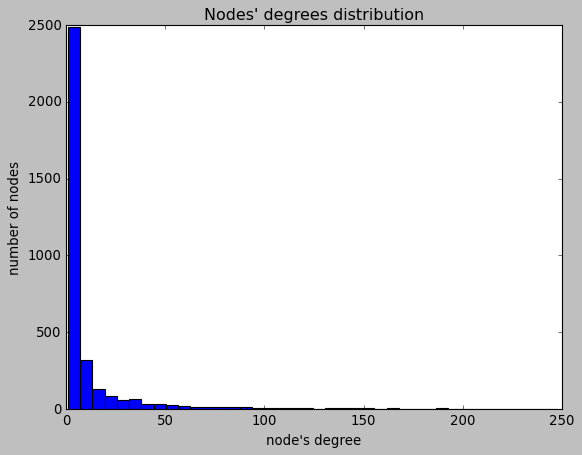

In [22]:
fig = plt.figure(1)
plt.hist([degree for (node, degree) in GCC.degree()], bins=40)
plt.xlabel("node's degree")
plt.ylabel("number of nodes")
plt.title("Nodes' degrees distribution")
plt.show()

## Rozkład potęgowy
Wyznaczenie współczynnika metodą regresji dla dopełnienia dystrybuanty rozkładu stopni, dla przedziałów rozlokowanych logarytmicznie

In [23]:
degrees = [degree for (node, degree) in GCC.degree()]

In [24]:
counted_degrees = np.histogram(degrees, max(degrees)- min(degrees))

Text(0, 0.5, 'liczba wierzcholkow')

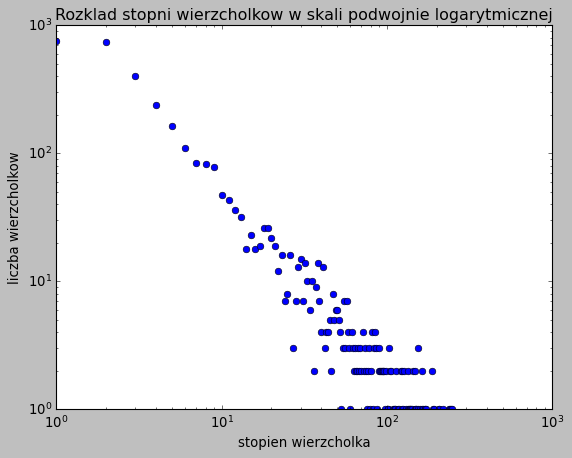

In [25]:
# rozklad stopni wierzcholkow w skali podwojnie logarytmicznej (obie osie)
plt.loglog( counted_degrees[1], np.append(counted_degrees[0],0), 'bo')
plt.title("Rozklad stopni wierzcholkow w skali podwojnie logarytmicznej")
plt.xlabel("stopien wierzcholka")
plt.ylabel("liczba wierzcholkow")

In [26]:
# utworzenie logarytmicznych pudelek do histogramu
log_bins = np.append([0], np.logspace(0, 3, 15, base=10))

# wyznaczenie histogramu dla zadanych pudelek
H, X1 = np.histogram(degrees, log_bins)
H = np.append(H, 0)

In [27]:
H

array([  0, 753, 736, 640, 358, 251, 198, 145, 137,  87,  60,  28,   4,
         0,   0,   0], dtype=int64)

In [28]:
# wyznaczenie dopelnienia dystrybuanty
H_cum = np.sum(H) - np.cumsum(H)
H_cum

array([3397, 2644, 1908, 1268,  910,  659,  461,  316,  179,   92,   32,
          4,    0,    0,    0,    0], dtype=int64)

Text(0, 0.5, 'liczba wierzcholkow')

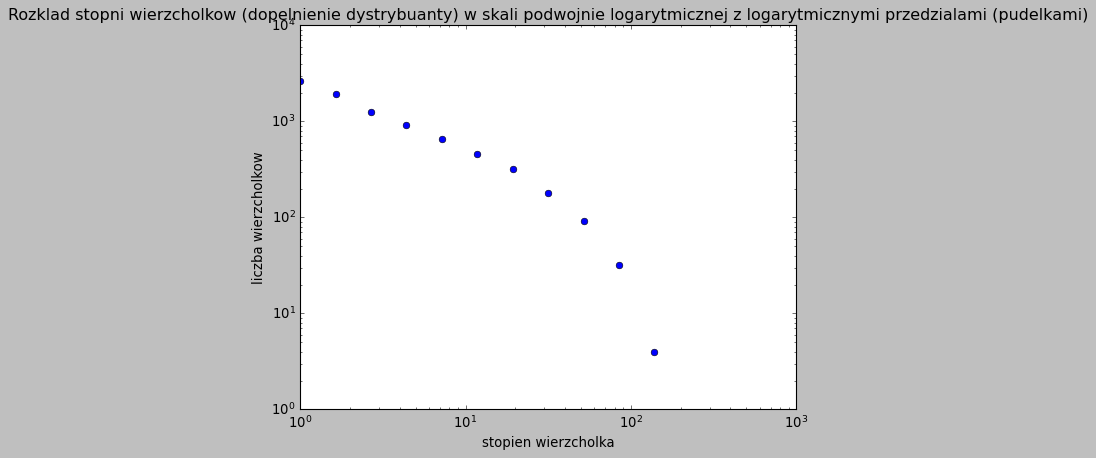

In [29]:
# rozklad stopni wierzcholkow (dopelnienie dystrybuanty) w skali podwojnie logarytmicznej z logarytmicznymi przedzialami (pudelkami)
x = X1
y = H_cum
plt.loglog(x, y, 'bo')
plt.title("Rozklad stopni wierzcholkow (dopelnienie dystrybuanty) w skali podwojnie logarytmicznej z logarytmicznymi przedzialami (pudelkami)")
plt.xlabel("stopien wierzcholka")
plt.ylabel("liczba wierzcholkow")

### Wyznaczenie regresji liniowej

In [30]:
# zapis funkcji rozkladu wierzcholkow (przedstawionego powyzej) w tablicy
fun = np.array((x,y)).T

In [31]:
funlog10 = np.array([[np.log10(vals[0]), np.log10(vals[1])] for vals in fun if vals[0]>0 and vals[1]>0]).T
xlog10 = funlog10[0].reshape((-1, 1))
ylog10 = funlog10[1]

In [32]:
model = LinearRegression()
model.fit(xlog10, ylog10)

LinearRegression()

In [33]:
xr = 10 ** xlog10
yr = 10 ** (xlog10 * model.coef_ + model.intercept_)
print("y(x) = x * ({}) + {}".format(model.coef_[0], model.intercept_))

y(x) = x * (-1.1179759478312457) + 3.6588427106421406


Text(0, 0.5, 'liczba wierzcholkow')

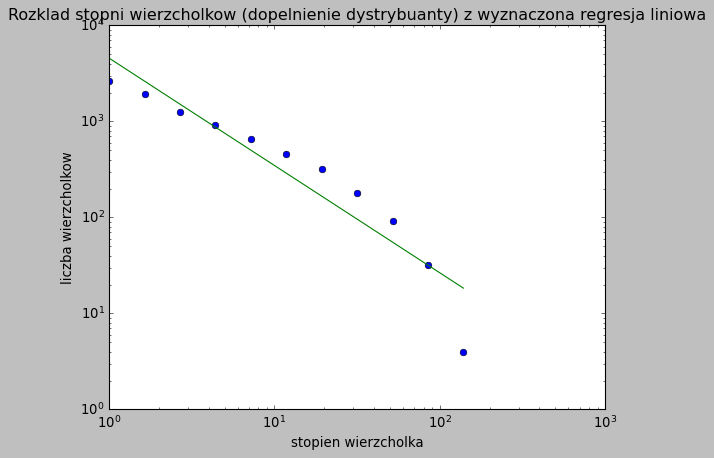

In [34]:
# regresja liniowa rozkladu stopni wierzcholkow - dopelnienie dystrybuanty
plt.loglog(x, y, 'bo')
plt.loglog(xr, yr, 'g-')
plt.title("Rozklad stopni wierzcholkow (dopelnienie dystrybuanty) z wyznaczona regresja liniowa")
plt.xlabel("stopien wierzcholka")
plt.ylabel("liczba wierzcholkow")

## Wykres Hilla
Estymacja współczynnika rozkładu potęgowego metodą największej wiarygodności z odrzuceniem początkowego fragmentu rozkładu - estymator Hilla.
Wykresem Hilla jest zależność estymatora od liczby uwzględnionych końcowych próbek.

In [45]:
# 
degrees_sorted = np.sort(degrees)
N = len(degrees)
k_range = range(2, N+1)
a_k = np.zeros(N-1, dtype=np.float64)
for k in range(2, N+1):
    y_k = 1/k * np.sum(np.log(degrees_sorted[N-k : ]/degrees_sorted[N-k]))
    a_k[k-2] = (1 + y_k ** -1)

In [46]:
a_k

array([123.99728993,  61.82833006,  41.10407821, ...,   1.71143672,
         1.71164627,   1.71185583])

Text(0, 0.5, 'alfa - estymator Hilla')

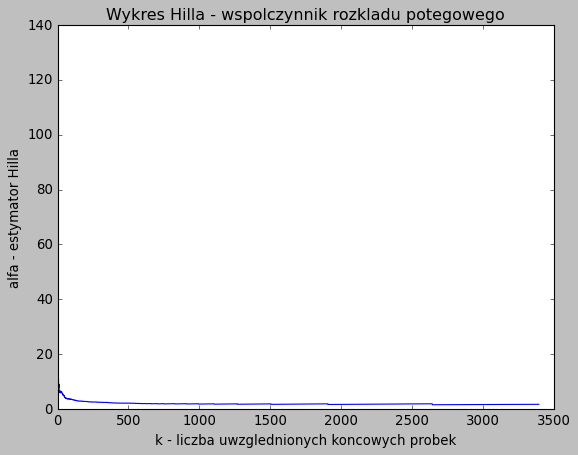

In [37]:
# caly wykres Hilla - przedstawia wspolczynnik alfa rozkladu potegowego dla k bedacego w przedziale [1, N]
start_idx = 0
plt.plot(k_range[start_idx:], a_k[start_idx:], '-')
plt.title("Wykres Hilla - wspolczynnik rozkladu potegowego")
plt.xlabel("k - liczba uwzglednionych koncowych probek")
plt.ylabel("alfa - estymator Hilla")

Text(0, 0.5, 'alfa - estymator Hilla')

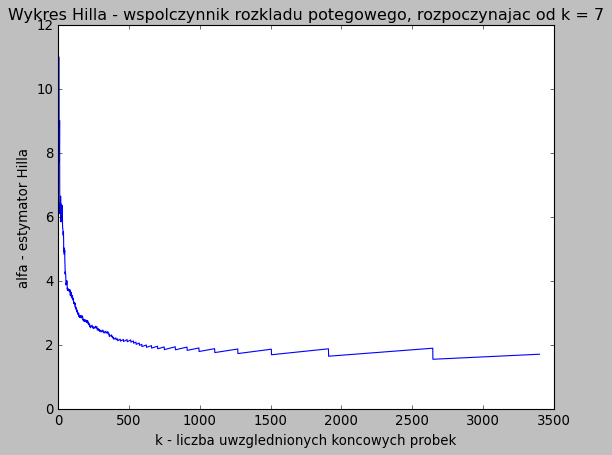

In [38]:
# fragment wykresu od elementu 5-tego
start_idx = 5
plt.plot(k_range[start_idx:], a_k[start_idx:], '-')
plt.title("Wykres Hilla - wspolczynnik rozkladu potegowego, rozpoczynajac od k = 7")
plt.xlabel("k - liczba uwzglednionych koncowych probek")
plt.ylabel("alfa - estymator Hilla")